In [1]:
import pandas as pd


result_df = pd.read_csv("train_results/results_Z5bw49Bh.csv")
result_df.columns

Index(['train_id', 'emb_dim', 'h_dim', 'latent_dim', 'categorical_dim',
       'batch_size', 'save_model', 'initial_temp', 'min_temp', 'epochs',
       'anneal_rate', 'activation', 'model_name', 'current_epoch',
       'train_loss', 'kld', 'recon_loss'],
      dtype='object')

In [2]:
columns = ['emb_dim', 'h_dim', 'latent_dim', 'categorical_dim', 'activation']

grouped_df = result_df.groupby(columns).agg({'train_loss': 'min'})
grouped_df.reset_index().sort_values(["train_loss", "latent_dim"])

,emb_dim,h_dim,latent_dim,categorical_dim,activation,train_loss
0,512,1024,15,1,bc,104.446464


In [4]:
emb_dim = 512
h_dim = 1024
latent_dim = 30
activation = 'bc'

df = result_df#[(result_df['emb_dim'] == emb_dim) & (result_df['h_dim'] == h_dim) & (result_df['latent_dim'] == latent_dim) & (result_df['activation'] == activation)]
df.sort_values('current_epoch', ascending=False)

,train_id,emb_dim,h_dim,latent_dim,categorical_dim,batch_size,save_model,initial_temp,min_temp,epochs,anneal_rate,activation,model_name,current_epoch,train_loss,kld,recon_loss
199,Z5bw49Bh,512,1024,15,1,128,True,1,0.5,200,0.00003,bc,daae_z_sum,199,112.159056,0.071163,112.087894
198,Z5bw49Bh,512,1024,15,1,128,True,1,0.5,200,0.00003,bc,daae_z_sum,198,108.751341,0.088043,108.663298
197,Z5bw49Bh,512,1024,15,1,128,True,1,0.5,200,0.00003,bc,daae_z_sum,197,110.419954,0.302343,110.117612
196,Z5bw49Bh,512,1024,15,1,128,True,1,0.5,200,0.00003,bc,daae_z_sum,196,110.903338,0.037462,110.865877
195,Z5bw49Bh,512,1024,15,1,128,True,1,0.5,200,0.00003,bc,daae_z_sum,195,111.487274,0.058463,111.428811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Z5bw49Bh,512,1024,15,1,128,True,1,0.5,200,0.00003,bc,daae_z_sum,4,116.053756,0.004788,116.048969
3,Z5bw49Bh,512,1024,15,1,128,True,1,0.5,200,0.00003,bc,daae_z_sum,3,117.282273,0.011983,117.270291
2,Z5bw49Bh,512,1024,15,1,128,True,1,0.5,200,0.00003,bc,daae_z_sum,2,118.031274,0.003209,118.028065
1,Z5bw49Bh,512,1024,15,1,128,True,1,0.5,200,0.00003,bc,daae_z_sum,1,120.230694,0.006682,120.224013


<AxesSubplot:>

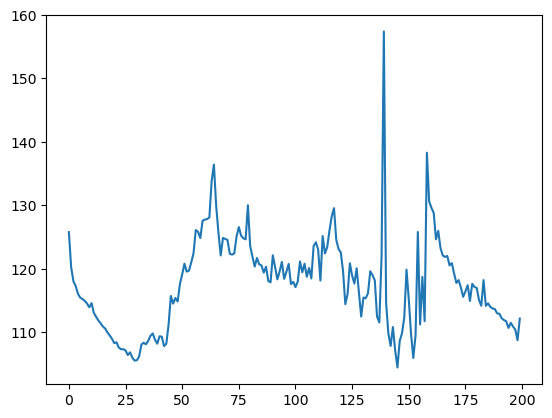

In [8]:
df['train_loss'].plot()
#df['recon_loss'].plot()
#df['kld'].plot()